In [1]:
try:
  import spright
except:
  !pip install spright

In [30]:
import os
import numpy as np
from spright import RMRelation
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 20
pd.options.display.max_rows = 30

filename = "planets_transit_host.tbl"

if not os.path.isfile(f"./{filename}"):
  !wget "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps+where+tran_flag=1+and+default_flag=1+order+by+pl_name&format=tsv" -O "planets_transit_host.tbl"

In [3]:
table = pd.read_table(filename)

In [4]:
table_mp = table[table["sy_pnum"]>=4]

In [5]:
subtable_mp = table_mp[["hostname", "sy_pnum", "pl_orbsmax", "pl_rade", "pl_radeerr1", "pl_radeerr2", "pl_orbincl", "st_mass", "pl_orbeccen", "pl_bmasse"]]

In [6]:
subtable_mp.head(5)

,hostname,sy_pnum,pl_orbsmax,pl_rade,pl_radeerr1,pl_radeerr2,pl_orbincl,st_mass,pl_orbeccen,pl_bmasse
0,55 Cnc,5,0.01544,1.875,0.029,-0.029,83.590,0.91,0.050,7.99
245,HD 108236,5,0.04527,1.615,0.051,-0.051,87.590,0.87,0.045,NaN
246,HD 108236,5,0.06200,2.071,0.052,-0.052,88.300,0.87,0.034,NaN
247,HD 108236,5,0.10740,2.539,0.062,-0.065,89.060,0.87,0.055,NaN
248,HD 108236,5,0.13670,3.083,0.052,-0.052,89.245,0.87,0.058,NaN


Computing missing masses

In [7]:
pl_bmasse_pred = []

for idx in subtable_mp.index:
  rmr = RMRelation()
  subtable_mp_idx = subtable_mp.loc[idx]
  pl_rade = subtable_mp_idx["pl_rade"]
  try:
    pl_radeerr = np.mean(np.abs(subtable_mp_idx[["pl_radeerr1", "pl_radeerr2"]]))
  except:
    raise ValueError()
  mds = rmr.predict_mass(radius=(pl_rade, pl_radeerr))
  pl_bmasse_pred.append(np.median(mds.samples))

subtable_mp["pl_bmasse_pred"] = pl_bmasse_pred

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/

In [8]:
table["pl_masse"]

0          7.99000
1         20.12000
2          9.60000
3         22.24810
4        327.35000
           ...    
4212     451.31860
4213     378.20000
4214    1398.45200
4215     225.34147
4216           NaN
Name: pl_masse, Length: 4217, dtype: float64

In [9]:
nullpred_idx = subtable_mp["pl_bmasse_pred"].isnull()
nullpred_idx = nullpred_idx[nullpred_idx].index
subtable_mp["pl_bmasse_pred"][nullpred_idx] = table["pl_masse"][nullpred_idx]
# nullpred_idx[nullpred_idx].index

<ipython-input-9-e0dac8164296>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable_mp["pl_bmasse_pred"][nullpred_idx] = table["pl_masse"][nullpred_idx]


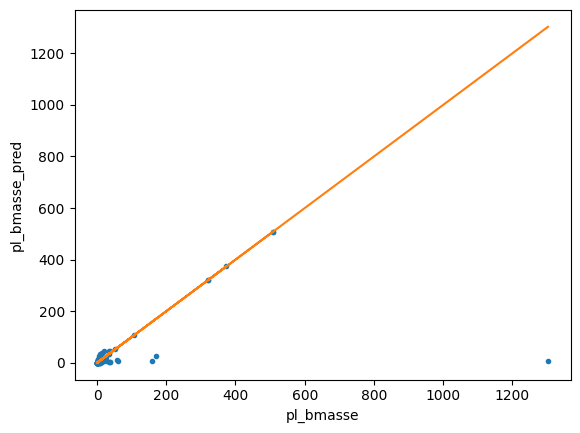

In [10]:
plt.figure()
plt.plot(subtable_mp["pl_bmasse"], subtable_mp["pl_bmasse_pred"], '.')
plt.plot(subtable_mp["pl_bmasse"], subtable_mp["pl_bmasse"])
plt.xlabel("pl_bmasse")
plt.ylabel("pl_bmasse_pred")
plt.show()

In [11]:
subtable_mp["pl_orbeccen_pred"] = 0.63 * subtable_mp["sy_pnum"]**(-1.02)

<ipython-input-11-220443fcd9eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable_mp["pl_orbeccen_pred"] = 0.63 * subtable_mp["sy_pnum"]**(-1.02)


In [12]:
subtable_mp

,hostname,sy_pnum,pl_orbsmax,pl_rade,pl_radeerr1,pl_radeerr2,pl_orbincl,st_mass,pl_orbeccen,pl_bmasse,pl_bmasse_pred,pl_orbeccen_pred
0,55 Cnc,5,0.01544,1.875,0.029,-0.029,83.590,0.91,0.0500,7.99000,4.317054,0.122009
245,HD 108236,5,0.04527,1.615,0.051,-0.051,87.590,0.87,0.0450,NaN,4.563923,0.122009
246,HD 108236,5,0.06200,2.071,0.052,-0.052,88.300,0.87,0.0340,NaN,5.367448,0.122009
247,HD 108236,5,0.10740,2.539,0.062,-0.065,89.060,0.87,0.0550,NaN,7.126241,0.122009
248,HD 108236,5,0.13670,3.083,0.052,-0.052,89.245,0.87,0.0580,NaN,10.799367,0.122009
...,...,...,...,...,...,...,...,...,...,...,...,...
4030,V1298 Tau,4,0.10830,6.410,0.450,-0.400,89.040,1.10,0.2100,NaN,44.966944,0.153193
4031,V1298 Tau,4,NaN,9.976,NaN,NaN,NaN,1.26,NaN,321.00669,321.006690,0.153193
4144,WASP-47,4,NaN,12.860,0.100,-0.100,89.000,1.06,0.0006,374.00000,374.000000,0.153193
4145,WASP-47,4,NaN,3.650,0.030,-0.030,89.230,1.06,0.0010,15.50000,15.933256,0.153193


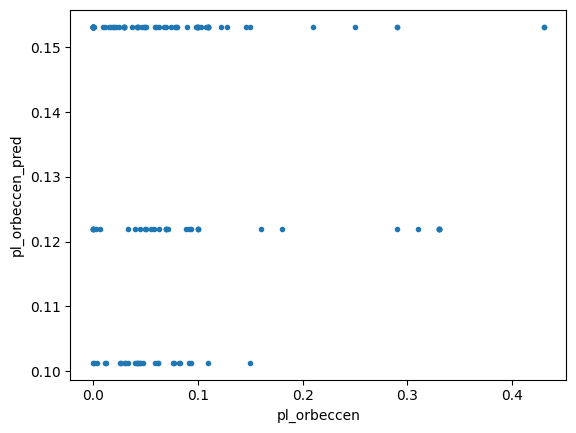

In [13]:
plt.figure()
plt.plot(subtable_mp["pl_orbeccen"], subtable_mp["pl_orbeccen_pred"], '.')
# plt.plot(subtable_mp["pl_orbeccen"], subtable_mp["pl_orbeccen"])
plt.xlabel("pl_orbeccen")
plt.ylabel("pl_orbeccen_pred")
plt.show()

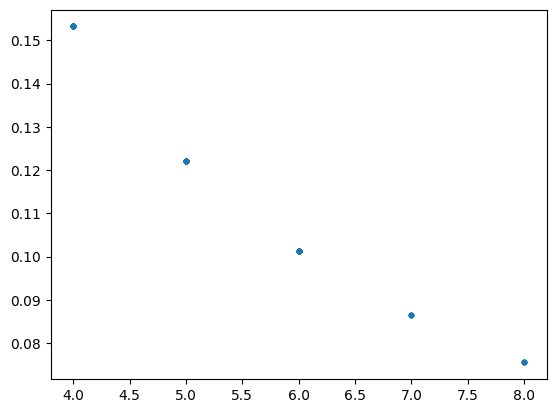

In [14]:
plt.plot(subtable_mp["sy_pnum"], subtable_mp["pl_orbeccen_pred"], '.')

In [15]:
sys_plmaxmass = subtable_mp.groupby("hostname")["pl_bmasse_pred"].max()

maxmass_idxs = []
for idx in subtable_mp["hostname"].index:
  hostname = subtable_mp["hostname"].loc[idx]
  result = False
  if subtable_mp["pl_bmasse_pred"].loc[idx] == sys_plmaxmass.loc[hostname]:
    result = True
  maxmass_idxs.append(result)


In [21]:
subtable_mp["pl_orbincl"]

0       83.590
245     87.590
246     88.300
247     89.060
248     89.245
         ...  
4030    89.040
4031       NaN
4144    89.000
4145    89.230
4146    86.730
Name: pl_orbincl, Length: 407, dtype: float64

In [26]:
sys_plmaxmass_incl = subtable_mp.groupby("hostname")[["pl_bmasse_pred", "pl_orbincl"]].max()
sys_plmaxmass_incl

,pl_bmasse_pred,pl_orbincl
hostname,,
55 Cnc,4.317054,83.590
HD 108236,10.799367,89.245
HD 110067,9.084731,89.867
HD 158259,NaN,NaN
HD 191939,13.450671,89.490
...,...,...
TOI-561,9.502530,89.800
TOI-700,7.461509,89.800
TRAPPIST-1,1.367429,89.896


In [39]:
pl_deltainclmaxmass = []
for idx in subtable_mp["hostname"].index:
  hostname = subtable_mp["hostname"].loc[idx]
  incl = 0
  if idx not in maxmass_idxs:
    incl = sys_plmaxmass_incl.loc[hostname]["pl_orbincl"] - subtable_mp["pl_orbincl"].loc[idx]
  pl_deltainclmaxmass.append(incl)

subtable_mp["pl_deltainclmaxmass"] = pl_deltainclmaxmass

<ipython-input-39-a75fbb64a0a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable_mp["pl_deltainclmaxmass"] = pl_deltainclmaxmass


In [40]:
subtable_mp

,hostname,sy_pnum,pl_orbsmax,pl_rade,pl_radeerr1,pl_radeerr2,pl_orbincl,st_mass,pl_orbeccen,pl_bmasse,pl_bmasse_pred,pl_orbeccen_pred,pl_masswincl,pl_relinclmaxmass,pl_deltainclmaxmass
0,55 Cnc,5,0.01544,1.875,0.029,-0.029,83.590,0.91,0.0500,7.99000,4.317054,0.122009,0.000,0.000,0.000
245,HD 108236,5,0.04527,1.615,0.051,-0.051,87.590,0.87,0.0450,NaN,4.563923,0.122009,1.655,1.655,1.655
246,HD 108236,5,0.06200,2.071,0.052,-0.052,88.300,0.87,0.0340,NaN,5.367448,0.122009,0.945,0.945,0.945
247,HD 108236,5,0.10740,2.539,0.062,-0.065,89.060,0.87,0.0550,NaN,7.126241,0.122009,0.185,0.185,0.185
248,HD 108236,5,0.13670,3.083,0.052,-0.052,89.245,0.87,0.0580,NaN,10.799367,0.122009,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,V1298 Tau,4,0.10830,6.410,0.450,-0.400,89.040,1.10,0.2100,NaN,44.966944,0.153193,0.000,0.000,0.000
4031,V1298 Tau,4,NaN,9.976,NaN,NaN,NaN,1.26,NaN,321.00669,321.006690,0.153193,NaN,NaN,NaN
4144,WASP-47,4,NaN,12.860,0.100,-0.100,89.000,1.06,0.0006,374.00000,374.000000,0.153193,0.230,0.230,0.230
4145,WASP-47,4,NaN,3.650,0.030,-0.030,89.230,1.06,0.0010,15.50000,15.933256,0.153193,0.000,0.000,0.000


In [41]:
subtable_mp["pl_amd_norm"] = subtable_mp["pl_bmasse_pred"] * np.sqrt(subtable_mp["st_mass"] * subtable_mp["pl_orbsmax"])

subtable_mp["pl_amd"] = subtable_mp["pl_amd_norm"] * (
    1 - np.sqrt(1 - subtable_mp["pl_orbeccen_pred"]**2) * np.cos(np.deg2rad(subtable_mp["pl_deltainclmaxmass"]))
)

<ipython-input-41-91d9447a5324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable_mp["pl_amd_norm"] = subtable_mp["pl_bmasse_pred"] * np.sqrt(subtable_mp["st_mass"] * subtable_mp["pl_orbsmax"])
<ipython-input-41-91d9447a5324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable_mp["pl_amd"] = subtable_mp["pl_amd_norm"] * (


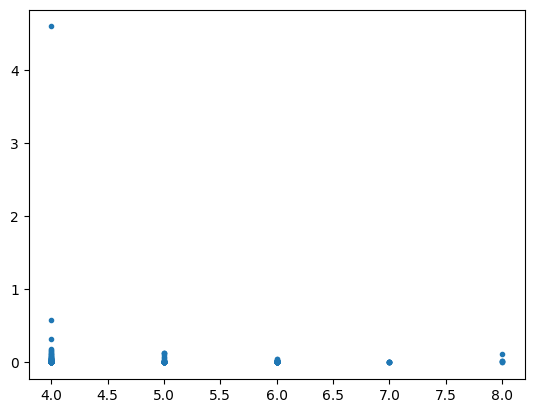

In [42]:
plt.plot(subtable_mp["sy_pnum"], subtable_mp["pl_amd"], '.')

In [43]:
sys_amd = subtable_mp.groupby("hostname")["pl_amd"].sum()
sys_amd_norm = subtable_mp.groupby("hostname")["pl_amd_norm"].sum()
sys_pnum = subtable_mp.groupby("hostname")["sy_pnum"].mean()

namd = sys_amd / sys_amd_norm

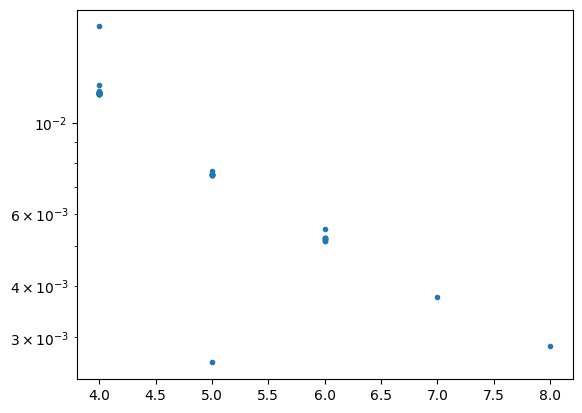

In [47]:
plt.plot(sys_pnum, namd, '.')
plt.yscale("log")
# plt.ylim(bottom=0.8)